In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
data=pd.read_csv('/home/danhd/Desktop/ZingMp3_Spam/spam1810.txt',sep='\t',header=None)
data.columns=['username','visitorID','songID']
data=data.dropna(subset=['visitorID'])
data.head(4)

,username,visitorID,songID
0,chinaquoc98,2000.3b515e605168b836e179.1445256609471.64e9d0c1,1073854610
1,NaN,2000.c373b528b2ff5ba102ee.1474598297105.6fa1712c,1073927311
2,NaN,2000.71f91bdd840f6d51341e.1476718461522.3a04949f,1075550712
3,NaN,2000.d23a6113f6401f1e4651.1419342432000.33115e52,1074603189


In [18]:
groupVisitorData=data.groupby(['songID']).agg({'visitorID':pd.Series.nunique,'songID':pd.Series.count})
groupVisitorData.columns=['Listen count','Visit count']
print groupVisitorData.head(6)

            Listen count  Visit count
songID                               
1073741840           595          196
1073741841            73           25
1073741842           289          108
1073741843            23            7
1073741844             2            2
1073741847             1            1

[6 rows x 2 columns]


In [19]:
groupVisitorData.describe()

,Listen count,Visit count
count,60235.000000,60235.000000
mean,108.231908,23.632257
std,2328.701099,379.627649
min,1.000000,1.000000
25%,1.000000,1.000000
50%,4.000000,2.000000
75%,20.000000,6.000000
max,294889.000000,50865.000000


In [20]:
groupVisitorData=data.groupby(['visitorID']).agg({'songID':pd.Series.nunique,'visitorID':pd.Series.count})
print groupVisitorData.head(6)

                                                  songID  visitorID
visitorID                                                          
2000.00000977fc61153f4c70.1448275184688.3741de07       1          1
2000.0000136deebf07e15eae.1476777740170.7490ab1a       1          8
2000.00004351cf8626d87f97.1474766466086.15c712d8       4         49
2000.00004a7264a78df9d4b6.1473754112999.38863d85       5         15
2000.00005ddb200ec950901f.1473835704591.8b80af76       1          4
2000.0000606d98bf71e128ae.1476781849765.f2d60cf7       1          9

[6 rows x 2 columns]


In [22]:
groupVisitorData.columns=['Song count','Listen count']
groupVisitorData.head(6)

,Song count,Listen count
visitorID,,
2000.00000977fc61153f4c70.1448275184688.3741de07,1,1
2000.0000136deebf07e15eae.1476777740170.7490ab1a,1,8
2000.00004351cf8626d87f97.1474766466086.15c712d8,4,49
2000.00004a7264a78df9d4b6.1473754112999.38863d85,5,15
2000.00005ddb200ec950901f.1473835704591.8b80af76,1,4
2000.0000606d98bf71e128ae.1476781849765.f2d60cf7,1,9


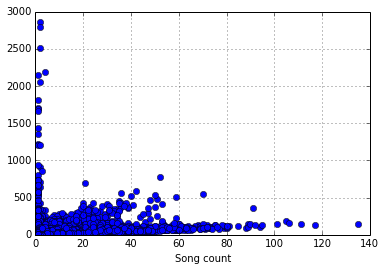

In [23]:
groupVisitorData.plot(x='Song count',y='Listen count',style='o')

In [24]:
groupVisitorData.describe()

,Song count,Listen count
count,687061.000000,687061.000000
mean,2.071852,9.488748
std,2.733030,17.354063
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,5.000000
75%,2.000000,11.000000
max,135.000000,2854.000000


In [15]:
groupUserInt=groupVisitorData['Listen count'].values.astype(int)
Q90, Q95, Q99 = np.percentile(groupUserInt, [90,95,99.99])
print Q90,Q95,Q99

23.0 34.0 362.588


In [54]:
abnormal=groupVisitorData[groupVisitorData['Listen count']>362]
print abnormal

                                                  Song count  Listen count
visitorID                                                                 
2000.0232071122d4cb8a92c5.1467217724977.d16a9813          35           454
2000.0baa4b0708c8e196b8d9.1471406751173.3cb3672f          38           395
2000.0fb6c6a65876b128e867.1475907110731.f088c389           1           419
2000.10b6e4805c40b51eec51.1469505194856.271c8cfc          23           370
2000.17da331ea83741691826.1459157897544.78cfdada          28           391
2000.1cdeb307ac1e45401c0f.1451816288874.5cad0d37           1           547
2000.1d097de6a7324e6c1723.1474461086312.8e2dac75           1           539
2000.1e3549f5a4364d681427.1469943216813.570fb8b3           1           591
2000.1f4682b16d8484dadd95.1461159849891.e75b401e           1           567
2000.27671adb9bf172af2be0.1460644039320.c9a2f54e          30           414
2000.2b960b2b3908d0568919.1456501824634.82fee916           2           422
2000.2d94c68aa0a949f710b8

Song count
Listen count


In [52]:
a=data[data['visitorID']=='2000.d703aae00d33e46dbd22.1476319412677.7b1963d7']
a=a.groupby('songID').agg({'songID':pd.Series.count})
a.head()

,songID
songID,
1075541003,606
1075753604,601


In [64]:
list=[]
for id in abnormal.index.values:
    userData=data[data['visitorID']==id]
    songGroup=userData.groupby('songID').agg({'songID':pd.Series.count})
    list.append(songGroup[songGroup['songID']>100]['songID'].values)
print list

[array([], dtype=int64), array([], dtype=int64), array([419]), array([], dtype=int64), array([], dtype=int64), array([547]), array([539]), array([591]), array([567]), array([], dtype=int64), array([421]), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([742]), array([], dtype=int64), array([512]), array([1226]), array([334, 380]), array([1435]), array([1710]), array([1424, 1430]), array([590]), array([571]), array([404]), array([455, 457]), array([105]), array([666]), array([], dtype=int64), array([1026, 1026]), array([463]), array([1686]), array([641]), array([940]), array([809]), array([], dtype=int64), array([], dtype=int64), array([742]), array([103]), array([], dtype=int64), array([2768]), array([545, 546, 547, 546]), array([1667]), array([], dtype=int64), array([1210]), array([364]), array([596]), array([], dtype=int64), array([796]), array([], dtype=int64), array([], dtype=int64), array([653]), array([], dtype=int64), array([2146]), array([], dtype=

In [61]:
print abnormal['Listen count'].max()

2854
